In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
def sampleGeneartor():
    X = np.arange(0, 5, 0.01)
    Y = X**3 - 4*X**2 + 1*X - 3
    e = np.random.normal(0, 2, 500)
    Y = Y + e
    plt.scatter(X, Y, 0.5)
    return X, Y

In [7]:
class woa():
    #初始化
    def __init__(self, X_train, Y_train, LB=np.array([-5, -5, -5, -5]),\
                 UB=np.array([5, 5, 5, 5]), dim=4, b=1, whale_num=20, max_iter=500):
        self.X_train = X_train
        self.Y_train = Y_train
        self.LB = LB
        self.UB = UB
        self.dim = dim
        self.whale_num = whale_num
        self.max_iter = max_iter
        self.b = b
        #Initialize the locations of whale
        self.X = np.random.uniform(0, 1, (whale_num, dim))*(UB - LB) + LB
        self.gBest_score = np.inf
        self.gBest_curve = np.zeros(max_iter)
        self.gBest_X = np.zeros(dim) 
    
    #适应度函数  
    def fitFunc(self, input):
        a = input[0]; b = input[1]; c = input[2]; d = input[3]
        Y_Hat = a*self.X_train**3 + b*self.X_train**2 + c*self.X_train + d 
        fitFunc = np.sum((Y_Hat - self.Y_train)**2)/np.shape(Y_Hat)[0]
        return fitFunc
    
    def rand_whale(self):
        """随机选择鲸鱼"""
        #while True:
        rand_index = random.randrange(0, self.whale_num)
        # print(rand_index)
            #if self.parm[rand_index, :].all() != self.gBest_parm.all() or self.gBest_parm.mean != 0:
                #break;
        return rand_index
    
    #优化模块  
    def optimize(self):
        """优化函数"""
        t = 0
        while t < self.max_iter:
            for i in range(self.whale_num):
                # 矫正边界
                self.X[i, :] = np.clip(self.X[i, :], self.LB, self.UB)
                fitness = self.fitFunc(self.X[i, :])
                # 更新 gBest_score and gBest_X
                if fitness < self.gBest_score:
                    self.gBest_score = fitness
                    self.gBest_X = self.X[i, :].copy()
            
            # 优化前 a = 2 * (self.max_iter - t)/self.max_iter
            # 余弦变化非线性控制因子
            a = 2  *  np.cos(np.pi  *  t / (2  *  self.max_iter))
            # 更新所有鲸鱼位置
            for i in range(self.whale_num):
                p = np.random.uniform()
                R1 = np.random.uniform()
                R2 = np.random.uniform()
                l = 2 * np.random.uniform() - 1
                # 参数向量
                A = 2 * a * R1 - a
                C = 2 * R2
                # 自适应权重因子w对数优化
                w = 1 - np.log(1 + (np.e - 1)  *  t / self.max_iter)
                if p >= 0.5:
                    #print(1)
                    # 螺旋泡泡攻击
                    D = abs(C * self.gBest_X - self.X[i, :])
                    self.X[i, :] = w  *  D * np.exp(self.b * l) * np.cos(2 * np.pi * l) + self.gBest_X
                else:

                    #搜索目标猎物
                    if abs(A) < 1:
                        #print(2)
                        # 以最优鲸鱼为目标，局部搜索
                        D = abs(self.gBest_X - self.X[i, :])
                        self.X[i, :] = self.gBest_X - w * A * D
                    else:
                        #print(3)
                        # 以随机鲸鱼为目标，全局搜索
                        rand_index = self.rand_whale()
                        parm_rand = self.X[rand_index, :]
                        D = abs(C * parm_rand - self.X[i, :])
                        self.X[i, :] = parm_rand - w * A * D
                # 随机差分变异优化 避免局部最优
                #print(4)
                rand_index = self.rand_whale()
                parm_rand = self.X[rand_index, :]
                self.X[i, :] = p * (self.gBest_X - self.X[i, :]) + p * (parm_rand - self.X[i, :])
            # 记录每个函数值（最小型）
            self.gBest_curve[t] = self.gBest_score       
            if (t % 100 == 0):
                print('At iteration: ' + str(t))  
            t += 1
        return self.gBest_curve, self.gBest_X

At iteration: 0
At iteration: 100
At iteration: 200
At iteration: 300
At iteration: 400
At iteration: 500
At iteration: 600
At iteration: 700
At iteration: 800
At iteration: 900
At iteration: 1000
At iteration: 1100
At iteration: 1200
At iteration: 1300
At iteration: 1400
At iteration: 1500
At iteration: 1600
At iteration: 1700
At iteration: 1800
At iteration: 1900


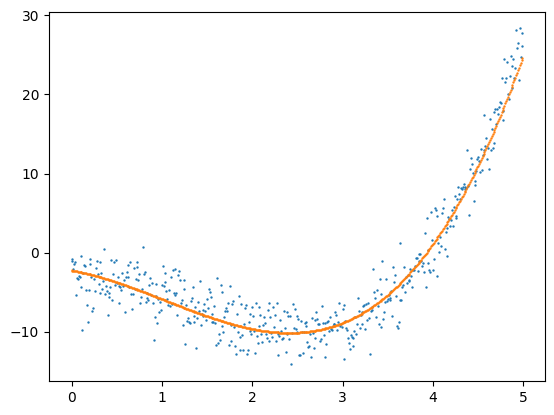

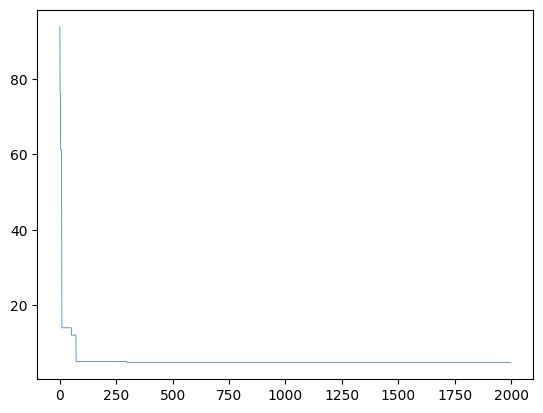

In [8]:
X, Y = sampleGeneartor()
fitnessCurve, para = woa(X, Y, dim=4, whale_num=60, max_iter=2000).optimize()
yPre = para[0]*X**3 + para[1]*X**2 + para[2]*X + para[3] 
plt.scatter(X, yPre, 0.5)

plt.figure()
plt.plot(fitnessCurve, linewidth='0.5')
plt.show()

In [9]:
para

array([ 0.77910996, -2.40666508, -2.00332733, -2.2419595 ])